# Content

#### 1. Importing libraries and data and renaming columns
#### 2. Data preparation
#### 3. The elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path: 
path = r'/Users/tuyetnguyen/Desktop/Career Foundry/Achievement 6/09-2023 Airbnb Listings and Neighborhoods Analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_prepared.csv'))

In [5]:
df.shape

(5547, 23)

In [6]:
df.head()

,Unnamed: 0,room_type,accommodates,bedrooms,bathrooms,amenities,price,minimum_nights,maximum_nights,number_of_reviews,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neighborhood,latitude,longitude,total_amenities,price_per_room,Price category
0,0,0,5,2.0,2.0,"['[Private patio or balcony', ' Ceiling fan', ...",240.0,4,200,24,...,5.00,5.00,4.61,4.65,Columbia City,47.56555,-122.29385,67,120.0,Moderate
1,1,0,4,2.0,1.0,"['[45\\ HDTV with Netflix', ' HBO Max', ' Hulu...",200.0,3,1125,60,...,4.98,5.00,5.00,4.83,Green Lake,47.68243,-122.33086,68,100.0,Affordable
2,2,0,2,1.0,1.0,"['[Dryer \\u2013\\u00a0In unit', ' Carbon mono...",81.0,30,731,2,...,5.00,5.00,3.50,5.00,Adams,47.66646,-122.37650,30,81.0,Affordable
3,3,0,2,1.0,1.0,"['[Baking sheet', ' Carbon monoxide alarm', ' ...",125.0,30,150,28,...,5.00,5.00,4.96,4.89,Wallingford,47.65480,-122.34042,35,125.0,Moderate
4,4,0,4,1.0,1.0,['[Free driveway parking on premises \\u2013 1...,128.0,30,1125,31,...,4.87,4.77,4.93,4.33,Montlake,47.64017,-122.32271,21,128.0,Moderate


### 2. Data preparation

##### Extreme values checks


<Axes: xlabel='price_per_room', ylabel='Count'>

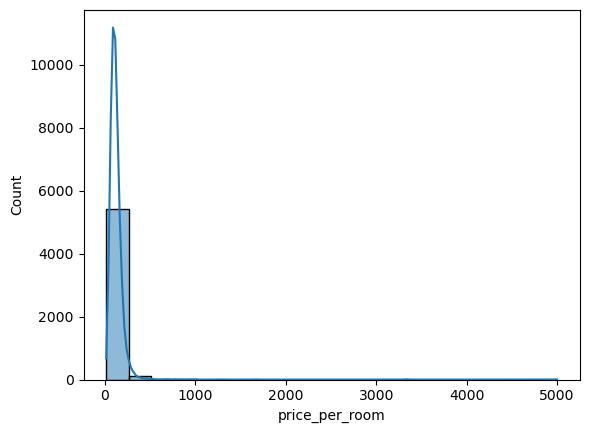

In [30]:
sns.histplot(df['price_per_room'], bins=20, kde = True) # shows extreme values for 'fat'

In [31]:
# Remove extreme values
df = df[df['price_per_room'] < 600] 
# rooms over $600 are unusually high-priced listings.

In [36]:
# Identify and remove categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df = df.drop(categorical_columns, axis=1)

### 2. The elbow technique


In [37]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [38]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/tuyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tuyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

[-15731830132.415667,
 -5077272681.3077965,
 -3108459420.3746843,
 -2417421173.688573,
 -2076672423.1695704,
 -1759422879.1984062,
 -1455433382.4901865,
 -1229747847.3936849,
 -1034135139.5686688]

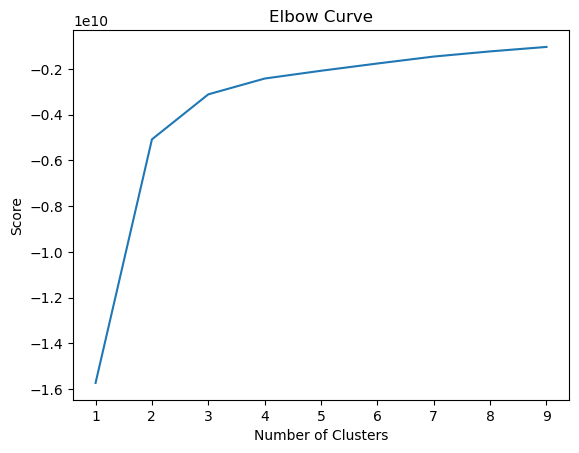

In [39]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow, or the breaking point of the curve, is at 3 --> the optimal count for your clusters is 3

### 3. k-means clustering

In [40]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [41]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/tuyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [47]:
# Attach a new column to the dataframe with the resulting clusters as shown in the 
df['clusters'] = kmeans.fit_predict(df)

/Users/tuyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
df.head()

,Unnamed: 0,accommodates,bedrooms,bathrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,total_amenities,price_per_room,clusters
0,0,5,2.0,2.0,240.0,4,200,24,4.79,4.92,4.83,5.00,5.00,4.61,4.65,47.56555,-122.29385,67,120.0,0
1,1,4,2.0,1.0,200.0,3,1125,60,5.00,4.98,4.98,4.98,5.00,5.00,4.83,47.68243,-122.33086,68,100.0,0
2,2,2,1.0,1.0,81.0,30,731,2,5.00,5.00,5.00,5.00,5.00,3.50,5.00,47.66646,-122.37650,30,81.0,0
3,3,2,1.0,1.0,125.0,30,150,28,5.00,4.96,4.96,5.00,5.00,4.96,4.89,47.65480,-122.34042,35,125.0,0
4,4,4,1.0,1.0,128.0,30,1125,31,4.60,4.77,4.53,4.87,4.77,4.93,4.33,47.64017,-122.32271,21,128.0,0


In [44]:
df['clusters'].value_counts()

0    1854
1    1843
2    1839
Name: clusters, dtype: int64

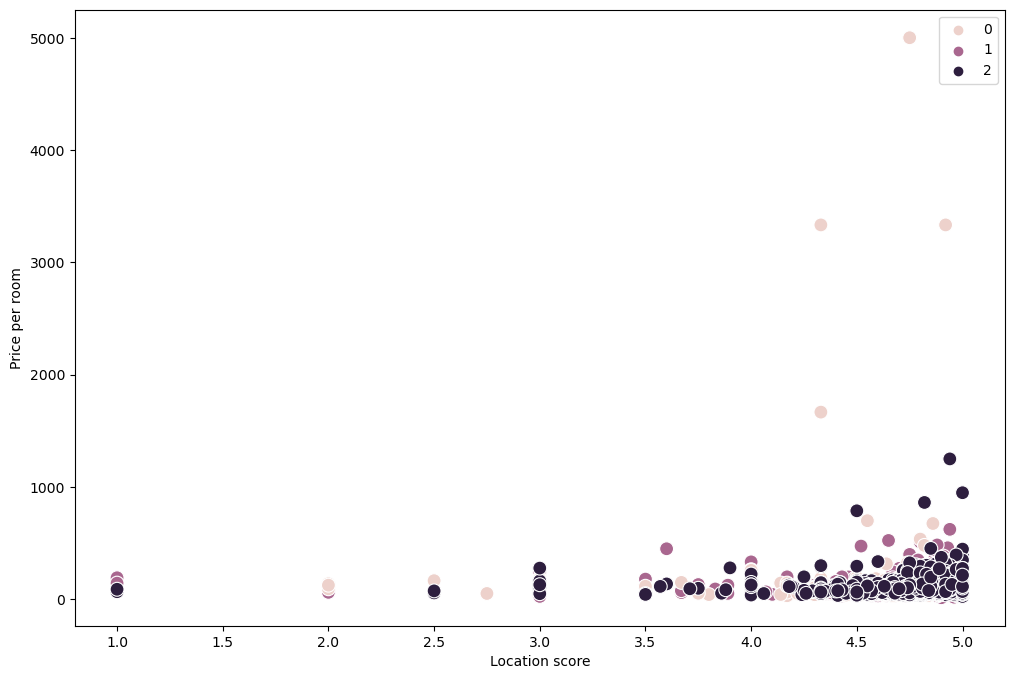

In [29]:
# Plot the clusters for the "price_per_room" and "review_scores_location" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['review_scores_location'], y=df['price_per_room'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Location score') # Label x-axis.
plt.ylabel('Price per room') # Label y-axis.
plt.show()

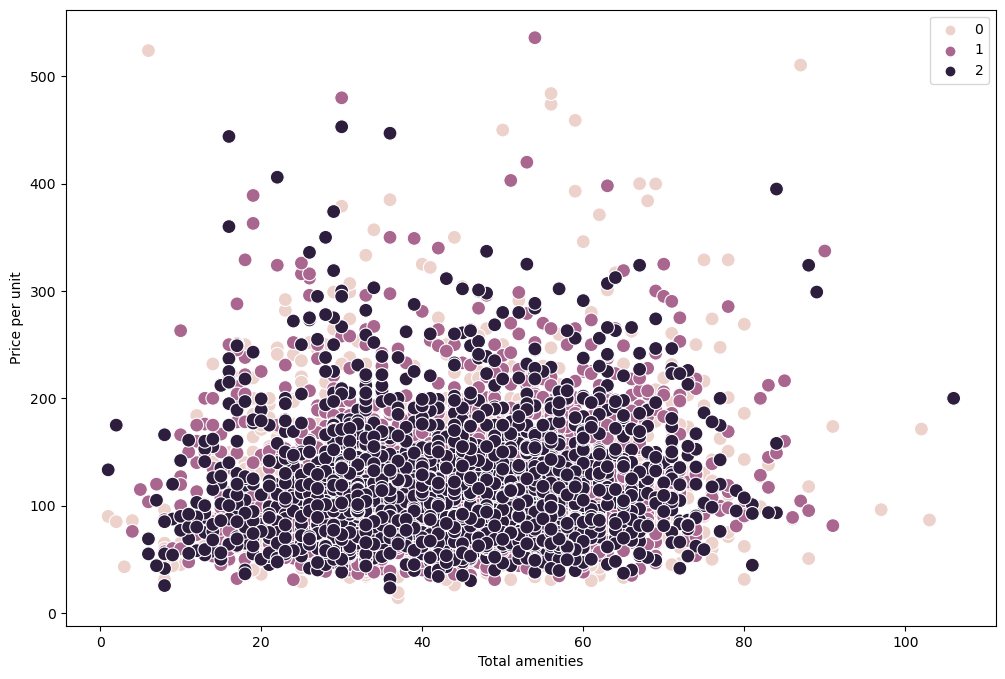

In [45]:
# Plot the clusters for the "total_amenities" and "price_per_room" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_amenities'], y=df['price_per_room'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total amenities') 
plt.ylabel('Price per unit') 
plt.show()

The clusters overlap significantly. It suggests that the clustering algorithm may not be well-suited for the data, or that the data itself may not exhibit clear, distinct clusters. 